In [146]:
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
df = pd.read_csv('corona_updated.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(1821, 5)

In [212]:
df['date'] = pd.to_datetime(df['date'])
# , format='%m%d'

In [213]:
df.tail()

,Country,TotalCases,TotalDeaths,TotalRecovered,date
1816,France,1209,21.0,12.0,2020-03-09
1817,Iran,7161,237.0,2394.0,2020-03-09
1818,Italy,7375,366.0,622.0,2020-03-09
1819,S. Korea,7478,53.0,166.0,2020-03-09
1820,China,80739,3120.0,58742.0,2020-03-09


### Countries

In [214]:
df['Country'] = df['Country'].apply(lambda x: x.replace('USA *', 'USA'))
df['Country'] = df['Country'].apply(lambda x: x.replace('U.S.', 'USA'))
df['Country'] = df['Country'].apply(lambda x: x.replace('United States', 'USA'))
df['Country'] = df['Country'].apply(lambda x: x.replace('United Kingdom', 'UK'))
df['Country'] = df['Country'].apply(lambda x: x.replace('U.K.', 'UK'))

In [215]:
countries = df['Country'].unique()

In [216]:
len(countries)

117

In [217]:
countries

array(['Sri Lanka', 'Finland', 'United Arab Emirates', 'Nepal',
       'Cambodia', 'Vietnam', 'Canada', 'Germany', 'France',
       'South Korea', 'USA', 'Australia', 'Japan', 'Singapore',
       'Malaysia', 'Macau', 'Taiwan', 'Hong Kong', 'Thailand', 'China',
       'India', 'Philippines', 'Sweden', 'UK', 'Italy', 'Russia', 'Macao',
       'Spain', 'U.A.E.', 'Belgium', 'S. Korea', 'Egypt', 'Cruise Ship',
       'Diamond Princess', 'Iran', 'Lebanon', 'Israel', 'Iraq', 'Bahrain',
       'Afghanistan', 'Oman', 'Kuwait', 'Switzerland', 'Croatia',
       'Austria', 'North Macedonia', 'Greece', 'Brazil', 'Algeria',
       'Pakistan', 'Romania', 'Norway', 'Georgia', 'Estonia', 'Denmark',
       'San Marino', 'Nigeria', 'New Zealand', 'Lithuania', 'Iceland',
       'Belarus', 'Azerbaijan', 'Netherlands', 'Mexico', 'Qatar',
       'Monaco', 'Ecuador', 'Armenia', 'Luxembourg', 'Ireland',
       'Dominican Republic', 'Czechia', 'Tunisia', 'Senegal',
       'Saudi Arabia', 'Morocco', 'Latvia', 'J

In [218]:
def countrydf(country, df):
    country_df = df[df['Country'] == country]
    return country_df

In [219]:
def country_total_plot(country_df):
    plt.figure(figsize=(12,8))
    sns.barplot(country_df['date'].dt.date, country_df['TotalCases'], palette="GnBu_d")
    plt.xticks(rotation=90, fontsize=13)
    plt.title(f'Total Cases of COVID-19: {country_df.iloc[0,0]}', fontsize=20)
    plt.ylabel('# of cases', fontsize=16)
    plt.xlabel('Date', fontsize=16)

In [220]:
USA = countrydf('USA', df)

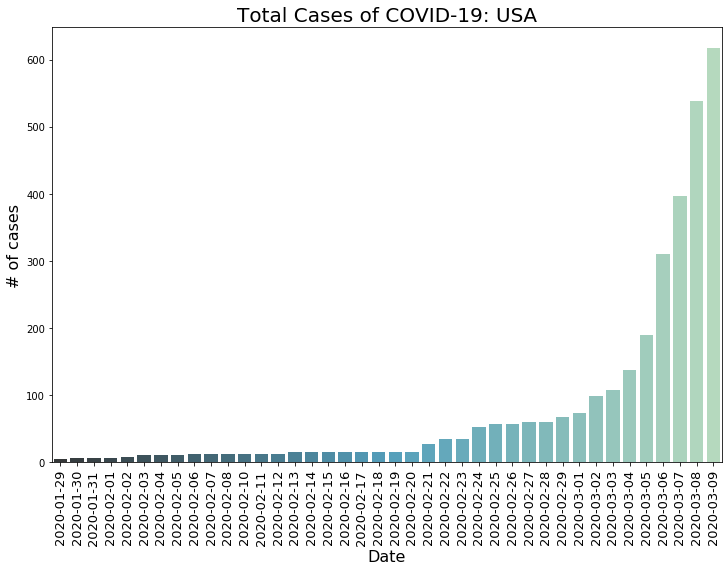

In [221]:
country_total_plot(USA)

In [222]:
SWEDEN = countrydf('Sweden', df)

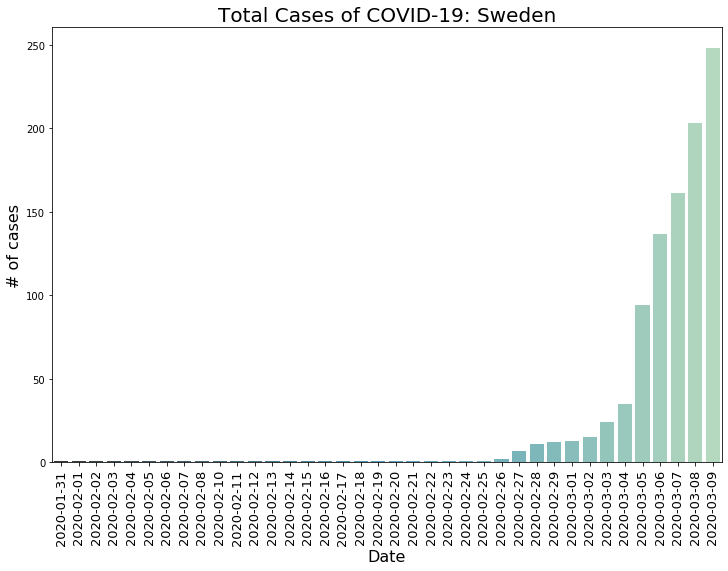

In [223]:
country_total_plot(SWEDEN)

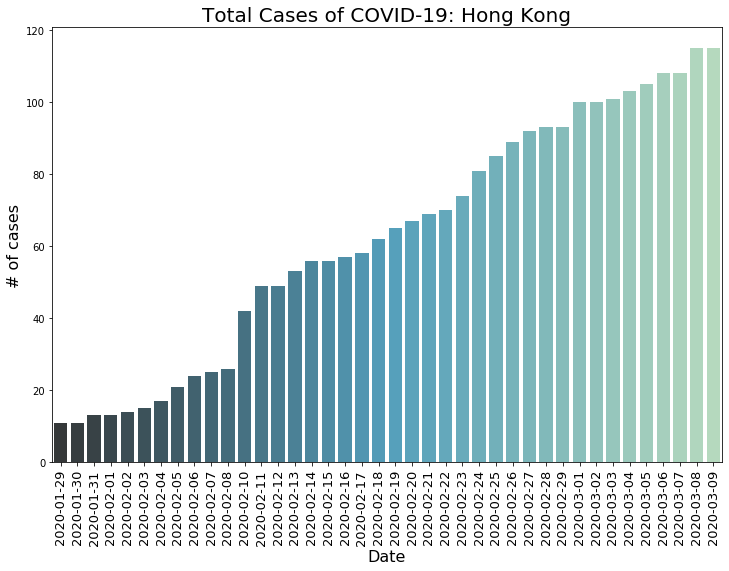

In [224]:
HK = countrydf('Hong Kong', df)
country_total_plot(HK)

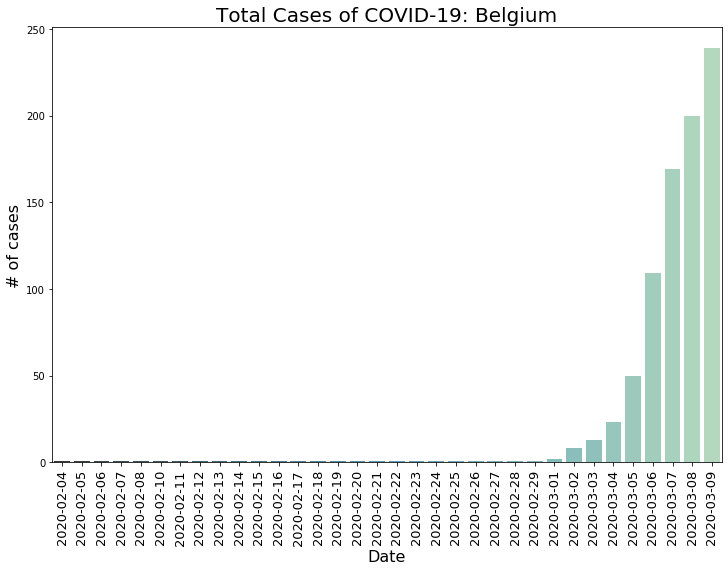

In [225]:
BELGIUM = countrydf('Belgium', df)
country_total_plot(BELGIUM)

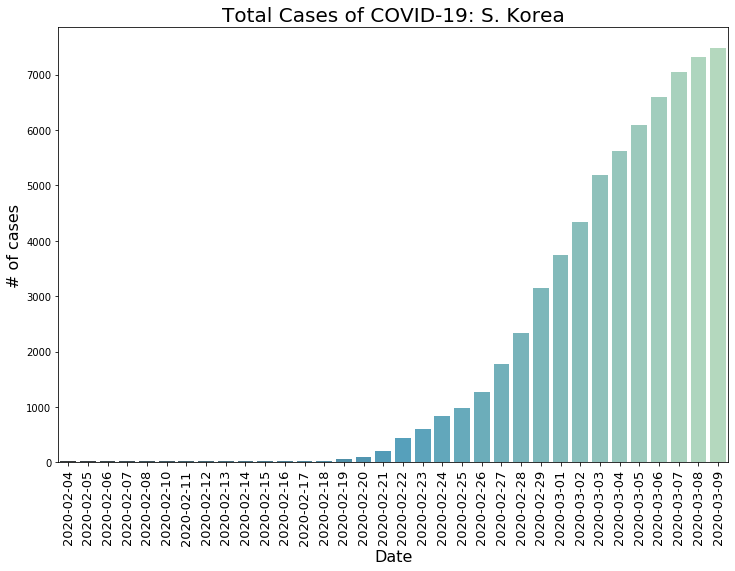

In [226]:
S_KOREA = countrydf('S. Korea', df)
country_total_plot(S_KOREA)

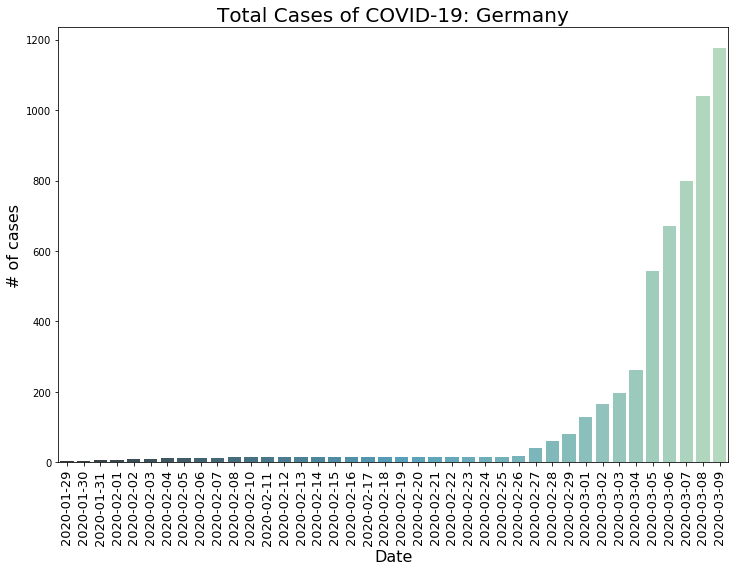

In [227]:
GERMANY = countrydf('Germany', df)
country_total_plot(GERMANY)

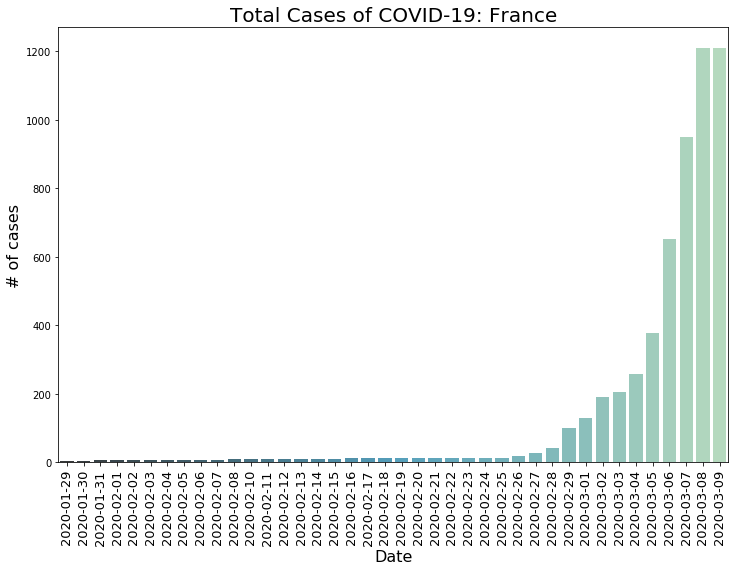

In [228]:
FRANCE = countrydf('France', df)
country_total_plot(FRANCE)

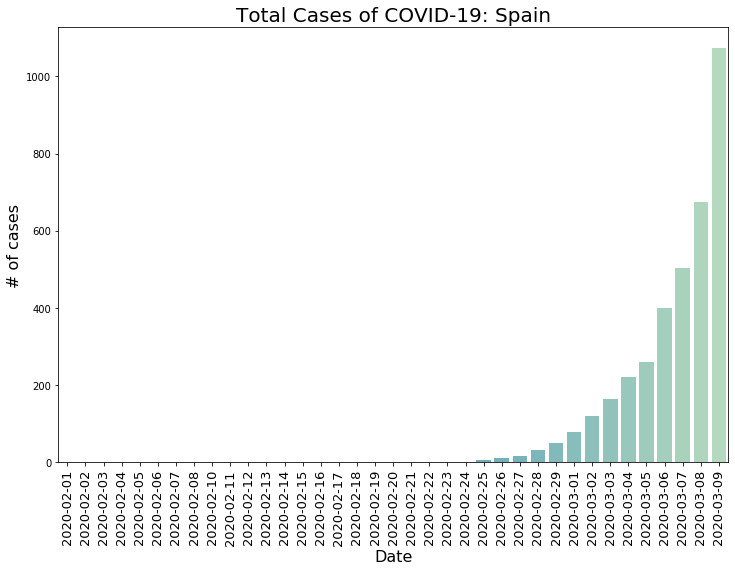

In [229]:
SPAIN = countrydf('Spain', df)
country_total_plot(SPAIN)

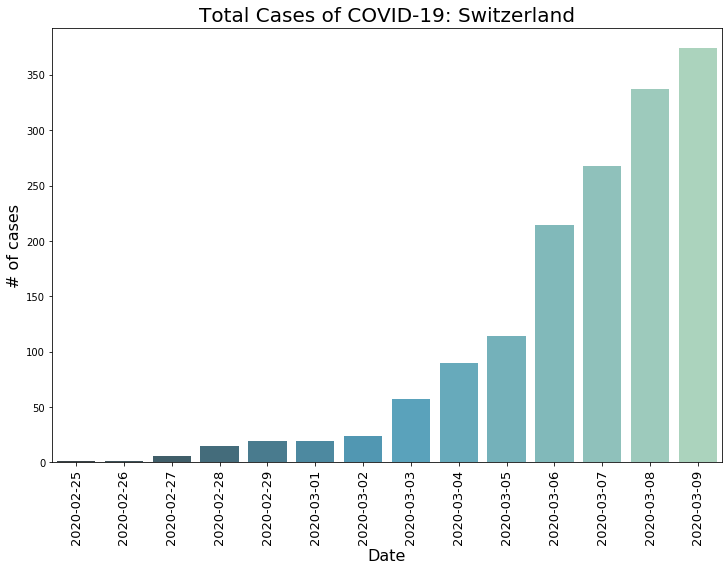

In [230]:
SWITZERLAND = countrydf('Switzerland', df)
country_total_plot(SWITZERLAND)

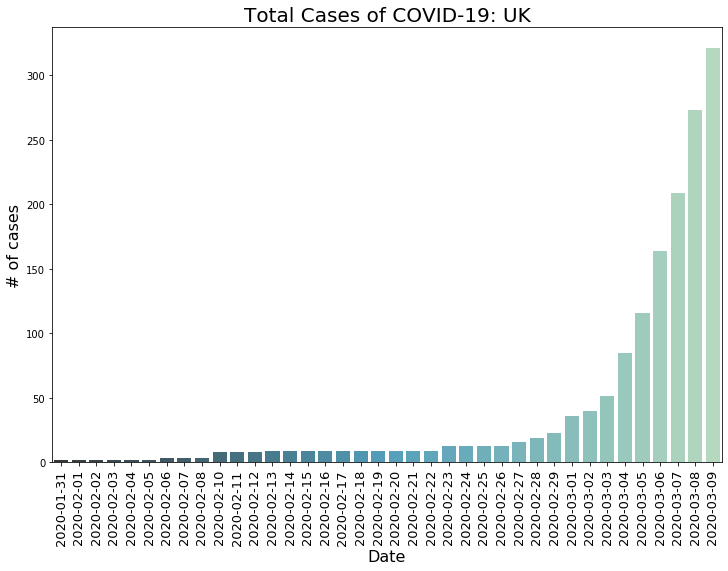

In [231]:
UK = countrydf('UK', df)
country_total_plot(UK)

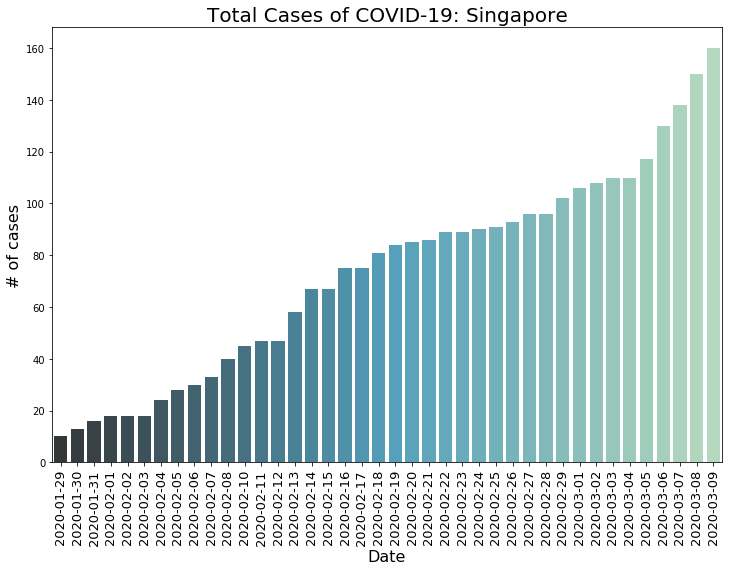

In [232]:
Singapore = countrydf('Singapore', df)
country_total_plot(Singapore)

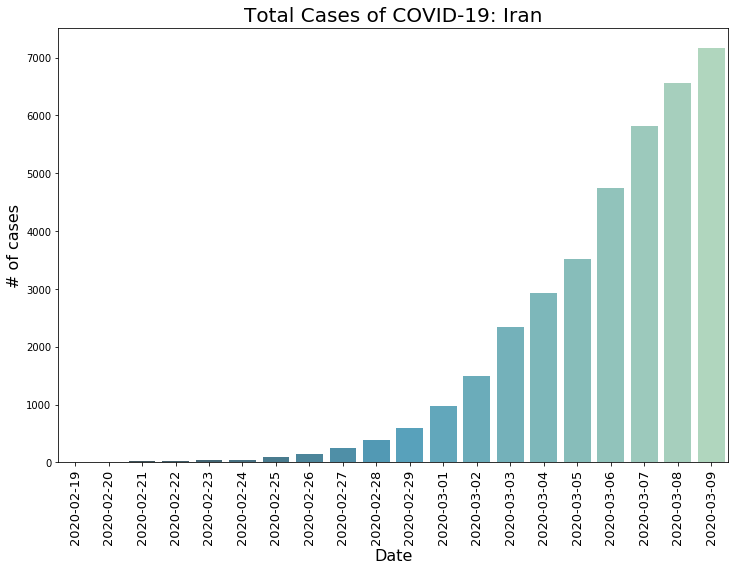

In [233]:
IRAN = countrydf('Iran', df)
country_total_plot(IRAN)

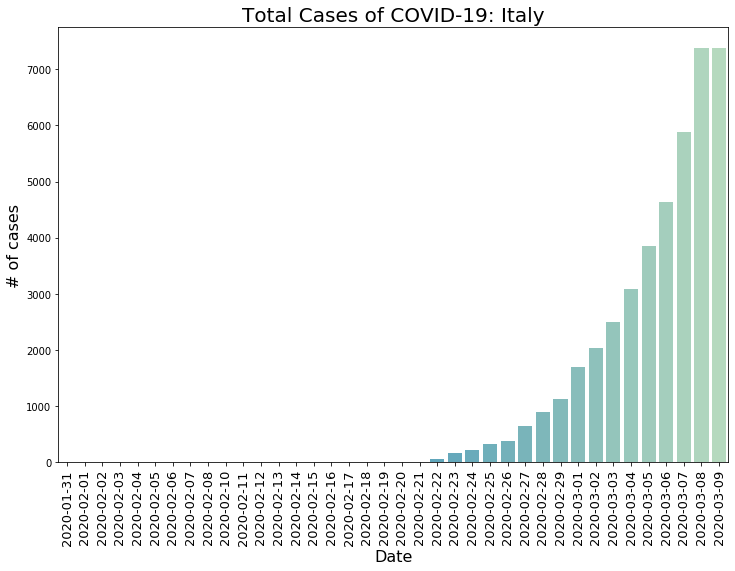

In [234]:
ITALY = countrydf('Italy', df)
country_total_plot(ITALY)

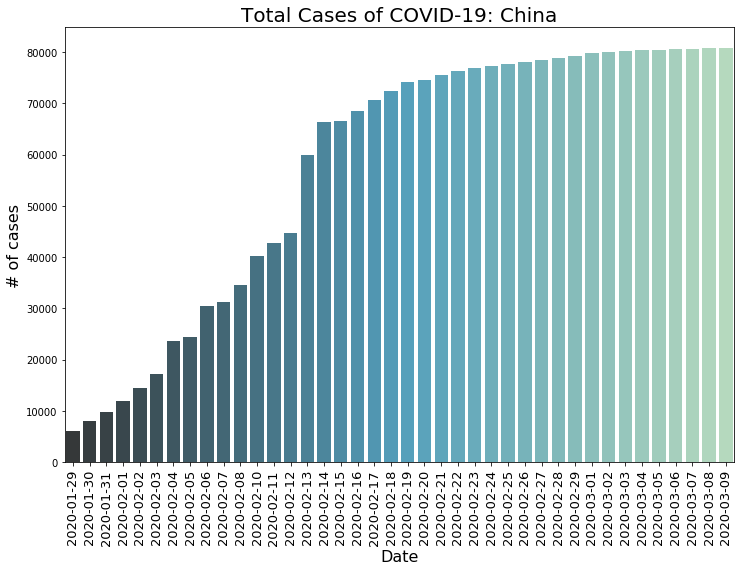

In [235]:
CHINA = countrydf('China', df)
country_total_plot(CHINA)

In [236]:
country_over_100 = ['Hong Kong',
 'Belgium',
 'Norway',
 'Netherlands',
 'Singapore',
 'Sweden',
 'UK',
 'Switzerland',
 'USA',
 'Spain',
 'France',
 'Germany',
 'Italy',
 'Iran',
 'S. Korea',]

In [237]:
infected_countries = df[(df['date'] == '2020-03-06') & (df['TotalCases'] > 100) & (df['TotalCases'] < 7000)] 

In [238]:
country_over_100 = infected_countries['Country'].to_list()

In [239]:

# plt.figure(figsize=(12,8))
# ax = sns.lineplot(x=infected_countries['date'].dt.date, y=infected_countries['TotalCases'], hue=infected_countries['Country'])

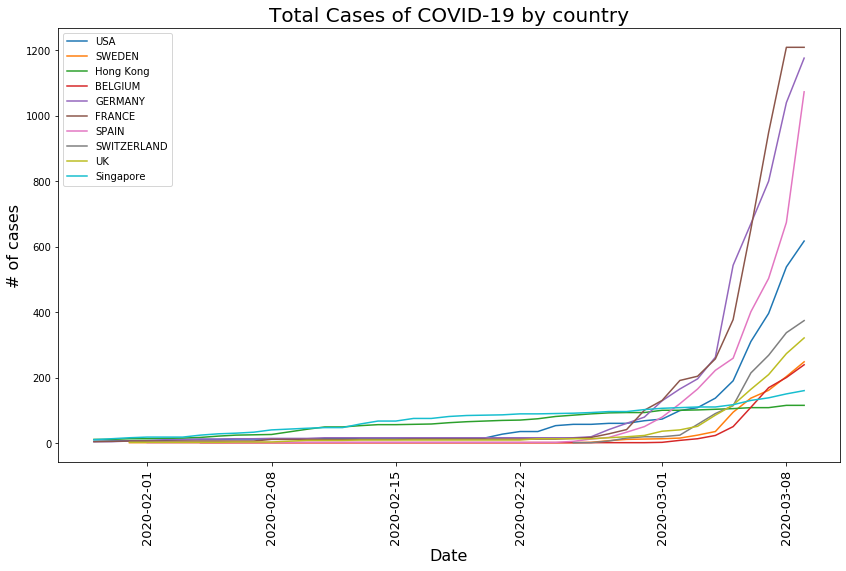

In [240]:
plt.figure(figsize=(14,8))
sns.lineplot(x=USA['date'].dt.date, y=USA['TotalCases'],
                  data=USA, label='USA')
sns.lineplot(x=SWEDEN['date'].dt.date, y=SWEDEN['TotalCases'],
                  data=SWEDEN, label='SWEDEN')
sns.lineplot(x=HK['date'].dt.date, y=HK['TotalCases'],
                  data=HK, label='Hong Kong')
sns.lineplot(x=BELGIUM['date'].dt.date, y=BELGIUM['TotalCases'],
                  data=BELGIUM, label='BELGIUM')
sns.lineplot(x=GERMANY['date'].dt.date, y=GERMANY['TotalCases'],
                  data=GERMANY, label='GERMANY')
sns.lineplot(x=FRANCE['date'].dt.date, y=FRANCE['TotalCases'],
                  data=FRANCE, label='FRANCE')
sns.lineplot(x=SPAIN['date'].dt.date, y=SPAIN['TotalCases'],
                  data=SPAIN, label='SPAIN')
sns.lineplot(x=SWITZERLAND['date'].dt.date, y=SWITZERLAND['TotalCases'],
                  data=SWITZERLAND, label='SWITZERLAND')
sns.lineplot(x=UK['date'].dt.date, y=UK['TotalCases'],
                  data=UK, label='UK')
sns.lineplot(x=Singapore['date'].dt.date, y=Singapore['TotalCases'],
                  data=Singapore, label='Singapore')
plt.xticks(rotation=90, fontsize=13)
plt.title(f'Total Cases of COVID-19 by country', fontsize=20)
plt.ylabel('# of cases', fontsize=16)
plt.xlabel('Date', fontsize=16)

ax.legend()

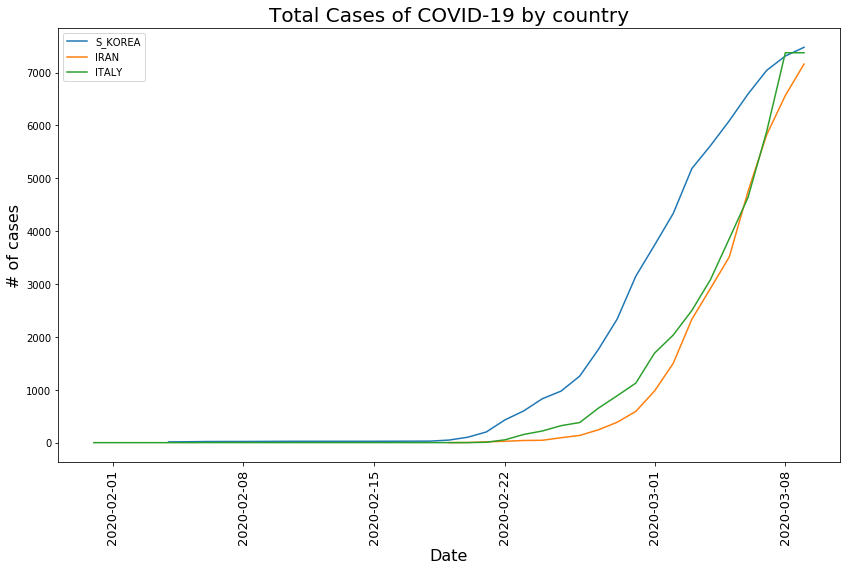

In [241]:
plt.figure(figsize=(14,8))
sns.lineplot(x=S_KOREA['date'].dt.date, y=S_KOREA['TotalCases'],
                  data=S_KOREA, label='S_KOREA')
sns.lineplot(x=IRAN['date'].dt.date, y=IRAN['TotalCases'],
                  data=IRAN, label='IRAN')
sns.lineplot(x=ITALY['date'].dt.date, y=ITALY['TotalCases'],
                  data=ITALY, label='ITALY')
plt.xticks(rotation=90, fontsize=13)
plt.title(f'Total Cases of COVID-19 by country', fontsize=20)
plt.ylabel('# of cases', fontsize=16)
plt.xlabel('Date', fontsize=16)

ax.legend()

### 4th Wave Countries

In [242]:
newly_infected = df[(df['date'] == '2020-03-06') & (df['TotalCases'] < 100) & (df['TotalCases']> 10)] 

In [243]:
newly_infected

,Country,TotalCases,TotalDeaths,TotalRecovered,date
1453,Qatar,11,0.0,0.0,2020-03-06
1454,Croatia,11,0.0,0.0,2020-03-06
1455,Russia,13,0.0,2.0,2020-03-06
1456,Portugal,13,0.0,0.0,2020-03-06
1457,Ecuador,13,0.0,0.0,2020-03-06
1458,Brazil,13,0.0,0.0,2020-03-06
1459,Finland,15,0.0,1.0,2020-03-06
1460,Egypt,15,0.0,1.0,2020-03-06
1461,Palestine,16,0.0,0.0,2020-03-06
1462,Oman,16,0.0,2.0,2020-03-06


Text(0.5, 0, 'Country')

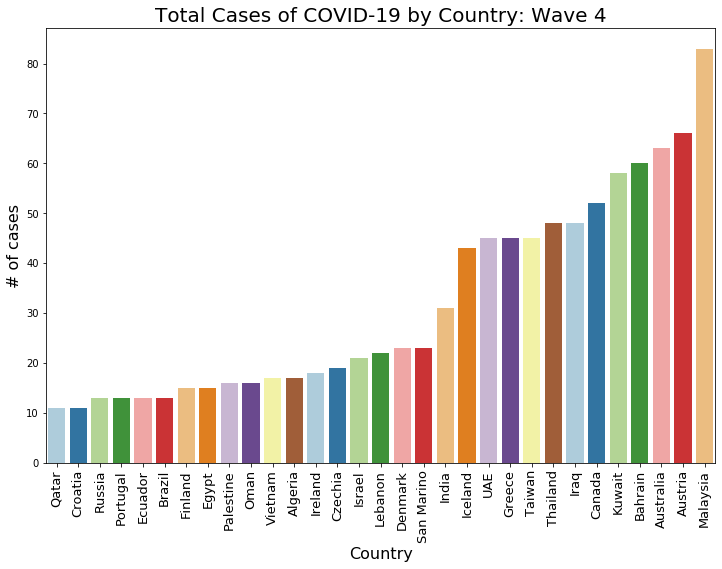

In [244]:
plt.figure(figsize=(12,8))
sns.barplot(newly_infected['Country'], newly_infected['TotalCases'], palette="Paired")
plt.xticks(rotation=90, fontsize=13)
plt.title(f'Total Cases of COVID-19 by Country: Wave 4', fontsize=20)
plt.ylabel('# of cases', fontsize=16)
plt.xlabel('Country', fontsize=16)

In [181]:
traveled_countries = pd.read_html('https://en.wikipedia.org/wiki/World_Tourism_rankings')

In [182]:
traveled_countries[0]

,Rank,Destination,International tourist arrivals (2018)[1],International tourist arrivals (2017)[1],Change (2017 to 2018) (%),Change (2016 to 2017) (%)
0,1,France,89.4 million,86.9 million,2.9,5.1
1,2,Spain,82.8 million,81.9 million,1.1,8.7
2,3,United States,79.6 million,76.9 million,3.5,0.7
3,4,China,62.9 million,60.7 million,3.6,2.5
4,5,Italy,62.1 million,58.2 million,6.7,11.2
5,6,Turkey,45.8 million,37.6 million,21.7,24.1
6,7,Mexico,41.4 million,39.3 million,5.5,12.0
7,8,Germany,38.9 million,37.5 million,3.8,5.2
8,9,Thailand,38.3 million,35.5 million,7.9,9.1
9,10,United Kingdom,36.3 million,37.6 million,3.5,5.1
